## 2425 Applied Statistics Final Project- Plant Growth
-------------------
**Author:** Alec Reid

**Student Number:** G00411003

**Date Commeced:** 27/12/2024

------------------- 

#### References and Sources
- https://sparkbyexamples.com/pandas/split-pandas-dataframe-by-column-value/#:~:text=Split%20DataFrame%20by%20Unique%20Column,utilizing%20the%20get_group()%20function.
- https://www.edlitera.com/blog/posts/pandas-add-rename-remove-columns#:~:text=To%20remove%20a%20column%20from,want%20to%20modify%20our%20DataFrame.
- https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
- https://datatab.net/tutorial/levene-test

### Table of Contents:

1. Imports 
2. Plant Growth Data Frame Overview  
3. T-test of Groups Treatment 1 and Treatment 2
4. ANOVA of Plant Groups Control, Treatment 1 and Treatment 2
5. Conclusion and Observations on Plant Growth Data Set

------------

### (1.) Imports

In [166]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

-----------------

### (2.) Plant Growth Data Frame Overview

#### (2.1) Dataframe Overview:
- Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
- 30 samples were weighed - 10 for control method, 10 for treatment method 1, 10 for treatment method 2

In [ ]:
# Read the CSV file
PG = pd.read_csv("PlantGrowth.CSV")

# View data
PG

In [ ]:
# Remove unneeded columns
PG.drop(columns =["rownames"], inplace=True)

#Show
PG

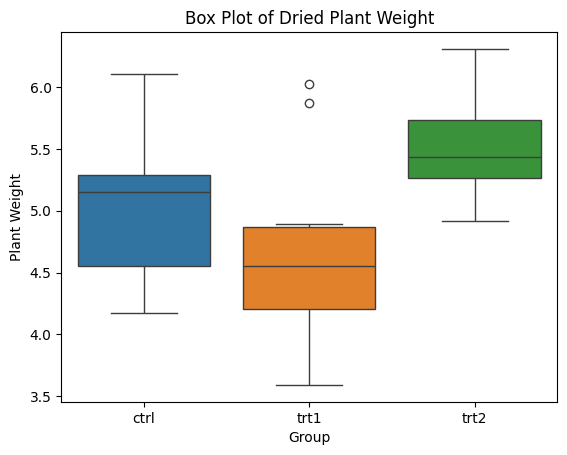

In [157]:
# Boxplot of each dried plant weight for each group
sns.boxplot(data=PG, x='group', y='weight', hue='group')
plt.title("Box Plot of Dried Plant Weight")
plt.xlabel("Group")
plt.ylabel("Plant Weight")
plt.show()

#### (2.2) Observations from Box Plot:
**Control Group**
- The control group appears to have a higer yield than treatment 1 and a lesser yeild than treatment 2.

**Treatment 1 Group**
- The treatment 1 group appears to return the lowest yeild in dried plant weight and the highest recored values observed for this yeild are clear outliers to the other values observed.
- ***Note** - Outlines should be considered for exclusion for statistical tests.*

**Treatment 2 Group** 
- The treatment 2 group appears to return the highest yiel in dried plant weight and has a visibly low standard deviation in values observed with no outliers.

In [ ]:
# Splitting plant growth data frame into differnt group type data frames
PG_grouped = PG.groupby (['group'])

PG_ctrl = PG_grouped.get_group("ctrl")
PG_trt1 = PG_grouped.get_group("trt1")
PG_trt2 = PG_grouped.get_group("trt2")

# Show Data 
print (PG_ctrl)
print (PG_trt1)
print (PG_trt2)


In [ ]:
# Description of dataframe for control group
PG_ctrl.describe()

,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


In [ ]:
# Description of dataset for treatment 1 group
PG_trt1.describe()

,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


In [ ]:
# Description of dataset for treatment 2 group
PG_trt2.describe()

,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


#### (2.3) Observations from Group Descriptions:

**Control Group**
- **Mean Value** = 5.03 (Highest of 3 groups)
- **Standard Deviation** = 0.58 (2nd Highest of 3 groups)

**Treatment 1 Group**
- **Mean Value** = 4.66 (Lowest of 3 groups)
- **Standard Deviation** = 0.79 (Highest of 3 groups)
- **Minimum Value** = 3.6 (Lowest of the 3 groups)

**Treatment 2 Group**
- **Mean Value** = 4.9 (2nd Highest of 3 groups)
- **Standard Deviation** = 0.44 (Lowest of 3 groups)
- **Maximum value** = 6.3 (Highest of 3 groups)


#### (2.4) Null Hypothesis Based on Pre-Statistical Observations

**Null Hypothesis 1**
- Treatment 2 does not yeild a higher dried plant weight than treatment 1.

**Null Hypothesis 2**
- Treatement 2 does not yeild a higher dried plant weight than the control group. 

-------------

#### (2) T-test of Groups Treatment 1 and Treatment 2:

A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related. 

In [ ]:
# Perform a t-test betwwwn groups trt1 and trt2
stats.ttest_ind(PG_trt1 ['weight'], PG_trt2 ['weight'])

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

**Null Hypothesis 1:**

- pvalue = 0.0075 which is below our significance threashold of 0.05, so we do not accept the null hypthesis.

- In this case we can conclude there is a statistically significant difference in dried plant weight yeild between treatment 1 and treatment 2.

In [160]:
# Perform a t-test between groups trt2 and ctrl
stats.ttest_ind(PG_ctrl['weight'], PG_trt2 ['weight'])

TtestResult(statistic=-2.1340204531240654, pvalue=0.04685138491157359, df=18.0)

**Null Hypotesis 2:**
- pvalue = 0.045 which is just below our significance threashold of 0.05, so we do not accept the null hypthesis.
- In this case we can conclude there is a statistically significant difference in dried plant weight yeild between treatment 2 and the control group.

---------------------

### (3) ANOVA of Plant Groups Control, Treatment 1 and Treatment 2:

#### (3.1) There are 6 assumptions we must satisfy in order to preform a one way ANOVA:

- **Assumption 1** Your dependant variable should be measured at the interval or ratio level (i.e they need to be numbers).
    - **Conclusion:** True for our weight values in Plant Growth Dataframe.

- **Assumption 2** Your independent variable should consist of two or more categorical independant groups.
    - **Conclusion:** True for our groups Control, Treatment 1 and Treatment 2.

- **Assumption 3** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. (i.e there must be different participants in each group and no participant can be in more than 1 group)
    - **Conclusion:** True for our groups, each plant weight has distinct ID. 

- **Assumption 4** There should ne no significant outliers. *(**note** - use a box plot to see if any outliers outside whisers)*
    - **Conclusion:** Alothough treatment 1 has an outlier for values observed for dried plant weight against other values observed in the treatment 1 group, the outlier value is not outside the range of the values observed for dried plant weights in the other control group or treatment 2 group. 

**Assumption 5** Your dependent variable should be approximately normally distributed for each category of the independent variable. 

In [162]:
# Shapiro wilks test to identify normal distribution
stats.shapiro(PG ['weight'])

ShapiroResult(statistic=0.9826830162369313, pvalue=0.8915073713066284)

- **Conclusion:** The pvalue generated in the shapiro-wilk test was 0.89 which is large and therfore indicates that the data is normally distributed.

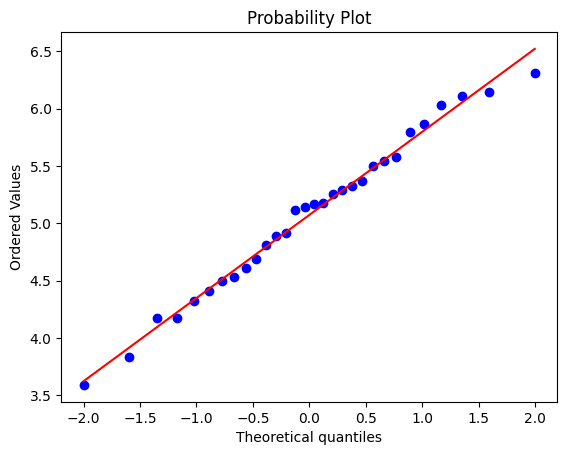

In [163]:
# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stats.probplot(PG['weight'], dist='norm', plot=ax);

- **Conclusion:** The QQ plot reveals a straight line between the points - supporting our null hypothesis that the data is normally distributed. 

**Assumption 6** There needs to be homogeneity of varianeces. 

In [ ]:
#Use levene test to identify 
res = stats.levene(PG_ctrl['weight'],PG_trt1['weight'],PG_trt2['weight'])

res.statistic

1.1191856948703909

**Conclusion:** If the p-value for the Levene test is greater than . 05, then the variances are not significantly different from each other (i.e., the homogeneity assumption of the variance is met). If the p-value for the Levene's test is less than . 05, then there is a significant difference between the variances.

#### (3.2) Perform One Way Anova:

In [173]:
#Perform ANOVA.
f_statistic, p_value = stats.f_oneway(PG_ctrl['weight'], PG_trt1['weight'], PG_trt2['weight'])

# Show.
f_statistic, p_value

(4.846087862380136, 0.015909958325622895)

#### (3.3) Observations of One Way Anova: